In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

base_csv = './data/IMDB Dataset.csv'
df = pd.read_csv(base_csv)
df.head()

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stop words (if not already downloaded)
nltk.download('stopwords')
# Preprocess the text to extract the vocabulary
def preprocess_text(text):
    text = text.lower()
    text = abbreviations[text.lower()] if text.lower() in abbreviations.keys() else text
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.strip()
    stop_words = set(stopwords.words('english'))  
    text_tokens = text.split()  
    filtered_text = [word for word in text_tokens if word not in stop_words]
    text = ' '.join(filtered_text)
    return text

# Tokenize and build the vocabulary
def build_vocab(dataframe, column_name):
    word_list = []
    for review in dataframe[column_name]:
        processed_review = preprocess_text(review)
        word_list.extend(processed_review.split())
    # Count word frequencies
    word_counts = Counter(word_list)
    return word_counts


vocab = build_vocab(df, 'review')

# Create a word-to-index dictionary
vocab = {word: i+1 for i, word in enumerate(vocab.keys())}  # Start indexing from 1
vocab['<Unknown>'] = 0

[nltk_data] Downloading package stopwords to /Users/jack/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


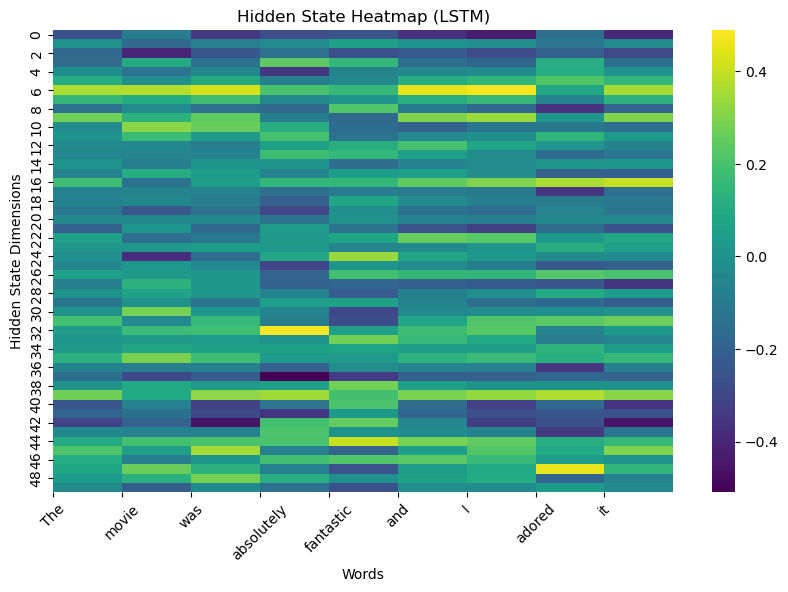

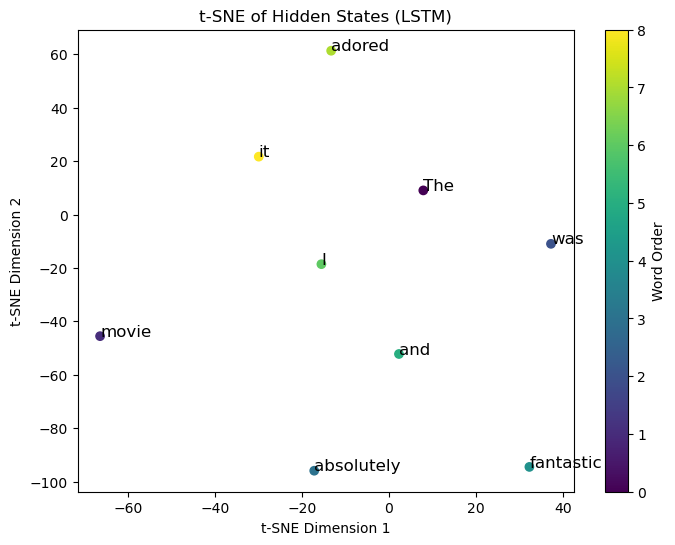

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def word_to_index(word, vocab):
    return vocab.get(word, vocab["<Unknown>"])

# -------------------------------
# 1. Fake Data Preparation
# -------------------------------
# Simulate a small vocabulary and some sentences
# vocab = {"<pad>": 0, "The": 1, "movie": 2, "was": 3, "fantastic": 4, "and": 5, "I": 6, "loved": 7, "it": 8}
vocab_size = len(vocab)
sentence = ["The", "movie", "was", "absolutely", "fantastic", "and", "I", "adored", "it"]
sentence_tensor = torch.tensor([word_to_index(word, vocab) for word in sentence], dtype=torch.long).unsqueeze(0)

# -------------------------------
# 2. Define RNN-Based Model
# -------------------------------
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, model_type="LSTM"):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if model_type == "LSTM":
            self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        elif model_type == "GRU":
            self.rnn = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        else:
            self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 2)
        self.hidden_dim = hidden_dim

    def forward(self, x):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)
        if isinstance(hidden, tuple):  # LSTM returns (hidden_state, cell_state)
            hidden = hidden[0]
        return output, hidden



# -------------------------------
# 4. Visualize Hidden States
# -------------------------------

# a. Heatmap of hidden states
def plot_heatmap(hidden_states, sentence, model_type):
    hidden_states = hidden_states.squeeze(0).numpy()
    plt.figure(figsize=(10, 6))
    sns.heatmap(hidden_states.T, annot=False, cmap="viridis", cbar=True)
    plt.xlabel("Words")
    plt.ylabel("Hidden State Dimensions")
    plt.xticks(ticks=range(len(sentence)), labels=sentence, rotation=45)
    plt.title(f"Hidden State Heatmap ({model_type})")
    plt.show()


# b. t-SNE visualization of hidden states
def plot_tsne(hidden_states, sentence, model_type):
    hidden_states = hidden_states.squeeze(0).numpy()
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(sentence)-1))
    reduced_hidden_states = tsne.fit_transform(hidden_states)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_hidden_states[:, 0], reduced_hidden_states[:, 1], c=range(len(sentence)), cmap="viridis")
    for i, word in enumerate(sentence):
        plt.text(reduced_hidden_states[i, 0], reduced_hidden_states[i, 1], word, fontsize=12)
    plt.title(f"t-SNE of Hidden States ({model_type})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.colorbar(label="Word Order")
    plt.show()

# Instantiate the model
embedding_dim = 100
hidden_dim = 50
model_type = "LSTM"  # Change to "RNN" or "GRU" for comparison
model = RNNModel(vocab_size, embedding_dim, hidden_dim, model_type)

# -------------------------------
# 3. Extract Hidden States
# -------------------------------
# Pass the fake sentence through the model
model.eval()
with torch.no_grad():
    hidden_states, final_hidden = model(sentence_tensor)

plot_heatmap(hidden_states, sentence, model_type)
plot_tsne(hidden_states, sentence, model_type)

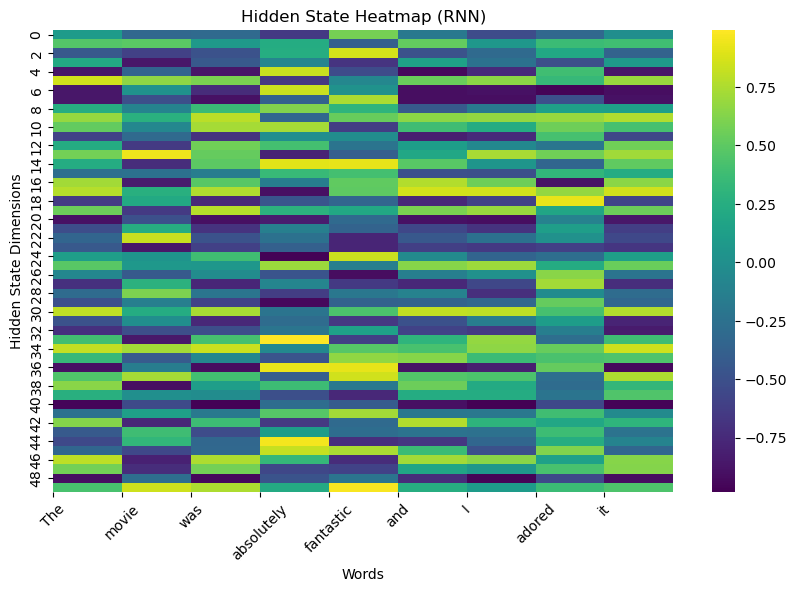

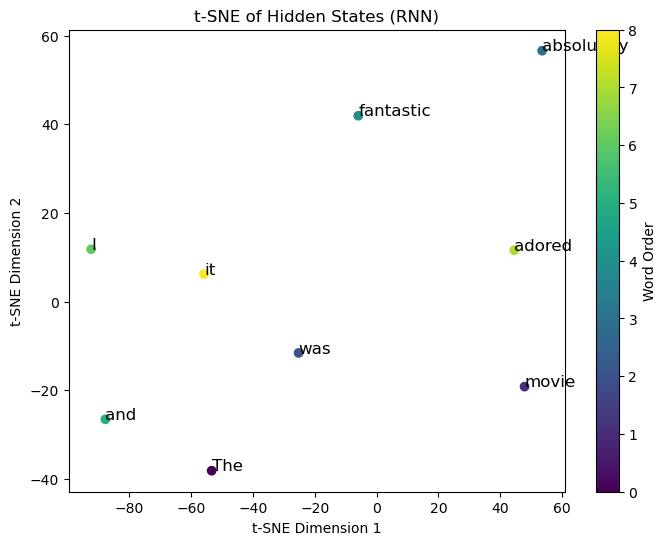

In [22]:
# Instantiate the model
embedding_dim = 100
hidden_dim = 50
model_type = "RNN"  # Change to "RNN" or "GRU" for comparison
model = RNNModel(vocab_size, embedding_dim, hidden_dim, model_type)

# -------------------------------
# 3. Extract Hidden States
# -------------------------------
# Pass the fake sentence through the model
model.eval()
with torch.no_grad():
    hidden_states, final_hidden = model(sentence_tensor)

plot_heatmap(hidden_states, sentence, model_type)
plot_tsne(hidden_states, sentence, model_type)

/var/folders/yf/pd4pg04s1qxdclcccwlbss6r0000gn/T/ipykernel_41129/726075117.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("rnn_encoder_decoder_a

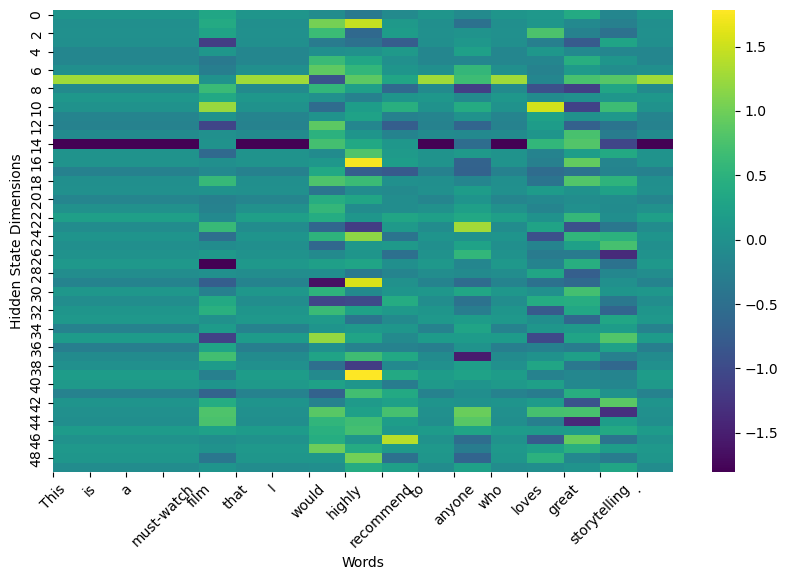

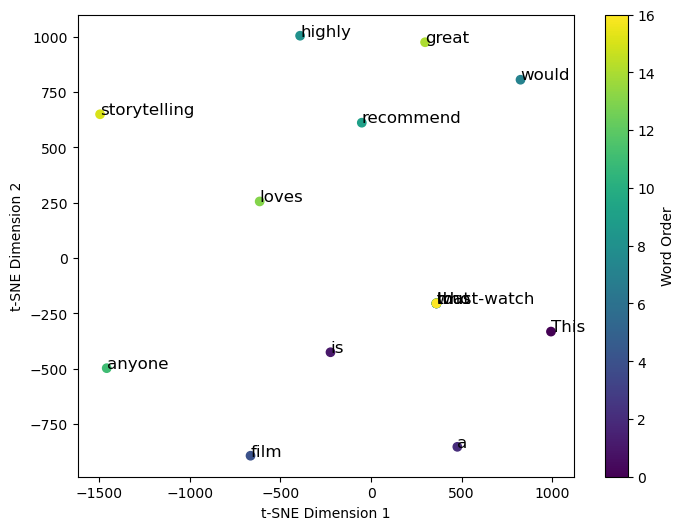

In [94]:
import torch
checkpoint = torch.load("rnn_encoder_decoder_attention.pth", map_location=torch.device('cpu'))
# sentence = ["The", "movie", "was", "absolutely", "fantastic", "and", "I", "adored", "it"]
sentence = [
    # "The", 
    # "movie", 
    # "was", 
    # "absolutely", 
    # "fantastic", 
    # "from", 
    # "start", 
    # "to", 
    # "finish", 
    # ".", 
    # "The", 
    # "acting", 
    # "was", 
    # "phenomenal", 
    # "and", 
    # "the", 
    # "storyline", 
    # "was", 
    # "captivating", 
    # ".", 
    # "I", 
    # "was", 
    # "fully", 
    # "immersed", 
    # "in", 
    # "the", 
    # "characters", 
    # "and", 
    # "their", 
    # "journey", 
    # ".", 
    # "The", 
    # "cinematography", 
    # "was", 
    # "stunning", 
    # "and", 
    # "the", 
    # "music", 
    # "perfectly", 
    # "complemented", 
    # "the", 
    # "emotions", 
    # ".", 
    "This", 
    "is", 
    "a", 
    "must-watch", 
    "film", 
    "that", 
    "I", 
    "would", 
    "highly", 
    "recommend", 
    "to", 
    "anyone", 
    "who", 
    "loves", 
    "great", 
    "storytelling", 
    "."
]

sentence_tensor = torch.tensor([word_to_index(word, vocab) for word in sentence], dtype=torch.long).unsqueeze(0)


# Extract the specific parameter 'encoder.rnn.weight_hh_l0'
weight_ih_l0 = checkpoint['encoder.rnn.weight_ih_l0']
embedding_layer_weight = checkpoint['encoder.embedding.weight']


# Define the embedding layer
embedding_layer = nn.Embedding(len(vocab), embedding_dim)

# Load the pretrained embeddings into the embedding layer
embedding_layer.weight.data.copy_(embedding_layer_weight)

# Print or process the parameter
embedded = embedding_layer(sentence_tensor)


res = torch.matmul(weight_ih_l0, embedded.squeeze(0).T).detach().numpy()
# a. Heatmap of hidden states
def plot_heatmap(hidden_states, sentence):
    # hidden_states = hidden_states.squeeze(0).numpy()
    plt.figure(figsize=(10, 6))
    sns.heatmap(hidden_states, annot=False, cmap="viridis", cbar=True)
    plt.xlabel("Words")
    plt.ylabel("Hidden State Dimensions")
    plt.xticks(ticks=range(len(sentence)), labels=sentence, rotation=45)
    # plt.title(f"Hidden State Heatmap ({model_type})")
    plt.show()


# b. t-SNE visualization of hidden states
def plot_tsne(hidden_states, sentence):
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(sentence)-1))
    reduced_hidden_states = tsne.fit_transform(hidden_states)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_hidden_states[:, 0], reduced_hidden_states[:, 1], c=range(len(sentence)), cmap="viridis")
    for i, word in enumerate(sentence):
        plt.text(reduced_hidden_states[i, 0], reduced_hidden_states[i, 1], word, fontsize=12)
    # plt.title(f"t-SNE of Hidden States ({model_type})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.colorbar(label="Word Order")
    plt.show()

plot_heatmap(res, sentence)
plot_tsne(res.T, sentence)
